In [9]:
import requests
import pandas as pd
import urllib3
from datetime import date, datetime
import matplotlib
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
# matplotlib.rcParams['font.family'] = ['Heiti TC']

# def rmax(maxrow: int=50):
#     pd.set_option('display.max_rows', maxrow)
# def cmax(maxcol: int=50):
#     pd.set_option('display.max_columns', maxcol)
from custom.exp1 import *
from custom.weather import *

## Get all station codes (所有測站代碼）

In [11]:
url = "https://e-service.cwb.gov.tw/wdps/obs/state.htm"
df = pd.read_html(url);df

[         站號      站名  海拔高度(m)          經度         緯度   城市  \
 0    466850  五分山雷達站    756.0  121.781205  25.071182  新北市   
 1    466880      板橋      9.7  121.442017  24.997647  新北市   
 2    466900      淡水     19.0  121.448906  25.164889  新北市   
 3    466910      鞍部    837.6  121.529731  25.182586  臺北市   
 4    466920      臺北      5.3  121.514853  25.037658  臺北市   
 ..      ...     ...      ...         ...        ...  ...   
 603  C1Z110      三棧    680.0  121.605010  24.115570  花蓮縣   
 604  C1Z120      壽豐     62.0  121.508081  23.870853  花蓮縣   
 605  C1Z130      銅門    187.0  121.492842  23.965694  花蓮縣   
 606  C1Z140      荖溪    950.0  121.459640  23.890575  花蓮縣   
 607  C1Z240    中平林道   1163.0  121.267630  23.421150  花蓮縣   
 
                              地址      資料起始日期  撤站日期  \
 0                  瑞芳區靜安路四段1巷1號  1998/07/01   NaN   
 1               板橋區大觀路二段265巷62號  1972/03/01   NaN   
 2                  淡水區中正東路42巷6號  1942/01/01   NaN   
 3                北投區陽明山竹子湖路111號  1937/01/01   NaN

In [16]:
df = pd.DataFrame(df[0]);df

,站號,站名,海拔高度(m),經度,緯度,城市,地址,資料起始日期,撤站日期,備註,原站號,新站號
0,466850,五分山雷達站,756.0,121.781205,25.071182,新北市,瑞芳區靜安路四段1巷1號,1998/07/01,NaN,本站只有雷達觀測資料。,NaN,NaN
1,466880,板橋,9.7,121.442017,24.997647,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN,原為探空站，自2002年開始進行氣象觀測。因受附近興建合宜住宅影響，日照觀測自民國104年起...,NaN,NaN
2,466900,淡水,19.0,121.448906,25.164889,新北市,淡水區中正東路42巷6號,1942/01/01,NaN,NaN,NaN,NaN
3,466910,鞍部,837.6,121.529731,25.182586,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN,NaN,NaN,NaN
4,466920,臺北,5.3,121.514853,25.037658,臺北市,中正區公園路64號,1896/01/01,NaN,2014至2015氣候年報之氣壓計海面上高度應為30.3m(2014/10/25搬遷，6.6...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
603,C1Z110,三棧,680.0,121.605010,24.115570,花蓮縣,秀林鄉雙露山,2017/12/01,NaN,原(C1Z090)站因移位，於2017/12/1變更為(C1Z110)站。,C1Z090,NaN
604,C1Z120,壽豐,62.0,121.508081,23.870853,花蓮縣,壽豐鄉壽豐村壽山路37號(壽豐鄉文康中心),2017/06/03,NaN,原(C1T890)站因移位，於2017/6/3變更為(C1Z120)站。,C1T890,NaN
605,C1Z130,銅門,187.0,121.492842,23.965694,花蓮縣,秀林鄉銅門村69號(銅門國小),2017/06/03,NaN,原(C1T860)站因移位，於2017/6/3變更為(C1Z130)站。,C1T860,NaN
606,C1Z140,荖溪,950.0,121.459640,23.890575,花蓮縣,秀林鄉,2018/03/23,NaN,NaN,NaN,NaN


In [18]:
df.head(10)

,站號,站名,海拔高度(m),經度,緯度,城市,地址,資料起始日期,撤站日期,備註,原站號,新站號
0,466850,五分山雷達站,756.0,121.781205,25.071182,新北市,瑞芳區靜安路四段1巷1號,1998/07/01,NaN,本站只有雷達觀測資料。,NaN,NaN
1,466880,板橋,9.7,121.442017,24.997647,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN,原為探空站，自2002年開始進行氣象觀測。因受附近興建合宜住宅影響，日照觀測自民國104年起...,NaN,NaN
2,466900,淡水,19.0,121.448906,25.164889,新北市,淡水區中正東路42巷6號,1942/01/01,NaN,NaN,NaN,NaN
3,466910,鞍部,837.6,121.529731,25.182586,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN,NaN,NaN,NaN
4,466920,臺北,5.3,121.514853,25.037658,臺北市,中正區公園路64號,1896/01/01,NaN,2014至2015氣候年報之氣壓計海面上高度應為30.3m(2014/10/25搬遷，6.6...,NaN,NaN
5,466930,竹子湖,607.1,121.544547,25.162078,臺北市,北投區陽明山竹子湖路2號,1937/01/01,NaN,NaN,NaN,NaN
6,466940,基隆,26.7,121.740475,25.133314,基隆市,仁愛區港西街6號6樓(海港大樓6樓),1946/01/01,NaN,NaN,NaN,NaN
7,466950,彭佳嶼,101.7,122.079744,25.627975,基隆市,中正區彭佳嶼,1910/01/01,NaN,NaN,NaN,NaN
8,466990,花蓮,16.1,121.613275,23.975128,花蓮縣,花蓮市花崗街24號,1910/01/01,NaN,NaN,NaN,NaN
9,467050,新屋,20.6,121.047486,25.006744,桃園市,新屋區東興路二段946號,2013/07/01,NaN,座標及高度於2013/10/09更正。自2020/01/01起施工，暫停供應資料。,NaN,NaN


## Download weather data

In [3]:
tp = get_historical_weather('466920', y_start=2015, y_end=2020, verbose=False)
yl = get_historical_weather('467080', y_start=2015, y_end=2020, verbose=False)
sa = get_historical_weather('467060', y_start=2015, y_end=2020, verbose=False)

# hc = get_historical_weather('467571', y_start=2010, y_end=2019, verbose=False)

In [45]:
# kl = get_historical_weather('466940', y_start=2010, y_end=2019, verbose=False)
# ts = get_historical_weather('466900', y_start=2010, y_end=2019, verbose=False)

# bq = get_historical_weather('466880', y_start=2010, y_end=2019, verbose=False)

In [13]:
# pjy = get_historical_weather('466950', y_start=2010, y_end=2019, verbose=False)
# zzu = get_historical_weather('466930', y_start=2010, y_end=2019, verbose=False)
# ab =  get_historical_weather('466910', y_start=2010, y_end=2019, verbose=False)

## Plot wind directions

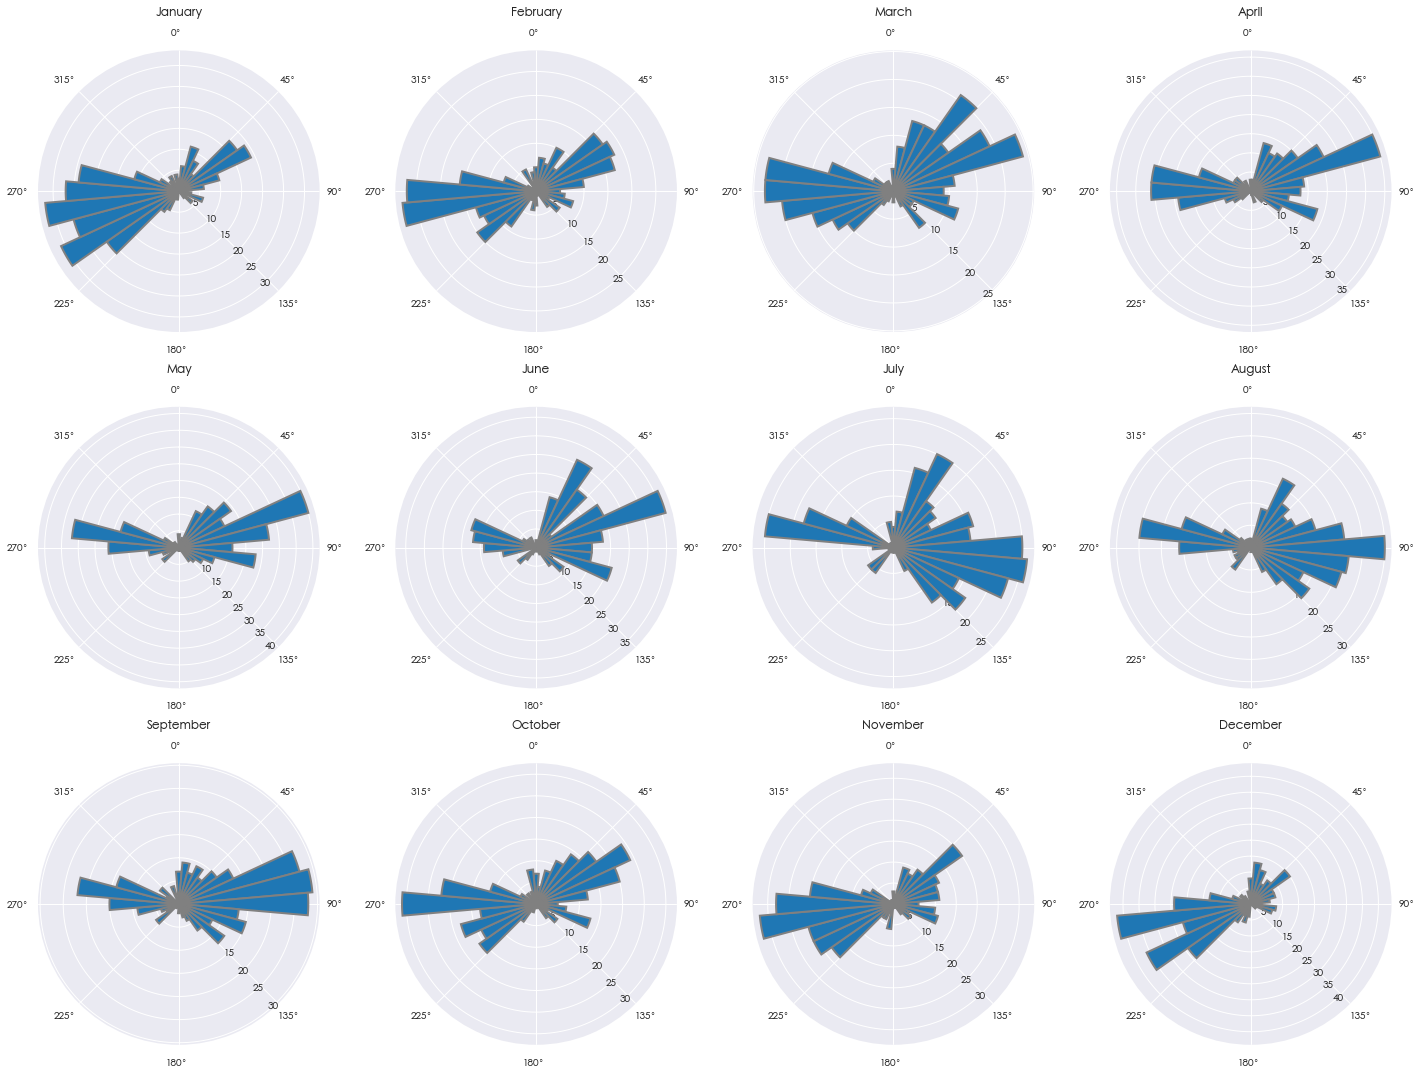

In [163]:
temp = yl.copy()
temp['Month'] = temp.index.month_name().astype('category')

fig, axes = plt.subplots(figsize=(20,15), ncols=4, nrows=3, subplot_kw=dict(polar=True))

for (i, m), ax in zip(enumerate(temp.Month.unique()), axes.flat):
    wind = temp[temp.Month==m].WD.replace('0', 'NA')
    plot_wind(wind, 10, ax=ax)
    ax.set_title(m, pad=20)

plt.tight_layout()

<BarContainer object of 36 artists>

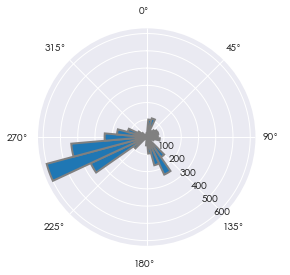

In [164]:
# WD = 0 means WS<0.2m/s --> ignore those values
wind = sa.WD.replace('0', 'NA')
plot_wind(wind, 10)

## Data cleaning and imputation

In [4]:
wd_col = yl.columns[yl.columns.str.match(r'.*WD.*')];wd_col
dict_df = {}
# dfs = [tp, yl, hc]
dfs = [tp, yl, sa]
# dfs = [tp, bq, kl, zzu, ab, yl, sa]
names = ['Taipei', 'Yilan', 'Suao']
# names = ['Taipei', 'Banqiau', 'Keelong']
# names = ['Taipei', 'Banqiau', 'Keelong', 'ZZH', 'ANBU', 'Yilan', 'Suao']
for df, name in zip(dfs, names):

    temp = cleanup_weather(df.copy())
    #Wind direction 0 indicates very low wind speed, mark those as NA
    temp[wd_col] = temp[wd_col].replace(0, 'NA')
    #change wind direction degrees into categories of 8 directions
    cat = temp[wd_col].apply(direction_binning, bin_degree=45)
    #one-hot encode categorical variables (wind direction)
    dummy = pd.get_dummies(cat, dummy_na=True)  #na indicates no wind
    dummy = dummy.loc[:, (dummy != 0).any(axis=0)]
    temp = pd.concat([temp.drop(columns=wd_col), dummy, cat], axis=1)
    dict_df[name] = impute_ExtraTrees(temp)
#     dict_df[name] = temp 

[IterativeImputer] Completing matrix with shape (1840, 37)
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (1840, 37)
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (1840, 37)
[IterativeImputer] Early stopping criterion reached.


In [5]:
dict_df.keys()
# dict_df['Taipei'].columns.difference(dict_df['Banqiau'].columns)
# ind1 = dict_df['Tamsui'].index
# ind2 = dict_df['Taipei'].index
# ind2.difference(ind1)

dict_keys(['Taipei', 'Yilan', 'Suao'])

### remove unused columns

In [12]:
weather = pd.concat(dict_df, axis=1)

drop = weather.columns[weather.columns.get_level_values(1).str.match(r'^WDGust')]
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.match(r'^WD')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.match(r'Stn')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.match(r'^Td dew point$')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.startswith('T ')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.match('RHMin')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.match('PresDif')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.match('GloblRad')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.endswith('RHDif')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.endswith('TempDif')])
drop = drop.append(weather.columns[weather.columns.get_level_values(1).str.startswith('PrecpH')])

imputed = weather.drop(columns=drop).copy()
imputed.columns = ['{1}_{0}'.format(*c) for c in imputed.columns]

imputed.info(verbose=True)

# imputed.to_csv('imputed.csv')
# imputed = pd.read_csv('imputed.csv')

# imputed['date'] =  pd.to_datetime(imputed['date'], format='%Y-%m-%d')
# imputed.set_index('date', drop=True, inplace=True)

# imputed.columns = imputed.columns.str.split('_', expand=True)
# imputed = imputed.swaplevel(axis=1)

# imputed.drop(columns='_merge', inplace=True)

# cmax(200)
# imputed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1840 entries, 2015-01-01 to 2020-01-14
Data columns (total 18 columns):
Temperature_Taipei     1840 non-null float64
RH_Taipei              1840 non-null float64
WS_Taipei              1840 non-null float64
WSGust_Taipei          1840 non-null float64
Precp_Taipei           1840 non-null float64
SunShineRate_Taipei    1840 non-null float64
Temperature_Yilan      1840 non-null float64
RH_Yilan               1840 non-null float64
WS_Yilan               1840 non-null float64
WSGust_Yilan           1840 non-null float64
Precp_Yilan            1840 non-null float64
SunShineRate_Yilan     1840 non-null float64
Temperature_Suao       1840 non-null float64
RH_Suao                1840 non-null float64
WS_Suao                1840 non-null float64
WSGust_Suao            1840 non-null float64
Precp_Suao             1840 non-null float64
SunShineRate_Suao      1840 non-null float64
dtypes: float64(18)
memory usage: 273.1 KB


## Try PCA without standardization (standard scaling)

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(imputed)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.64297958 0.23249574 0.05532957]


In [20]:
x = pd.DataFrame(data = pca.components_, columns=imputed.columns);x

Yilan                                                              \
  Temperature     T Max     T Min        RH     RHMin        WS    WSGust   
0   -0.078149 -0.106863 -0.051243  0.122481  0.186195 -0.003343 -0.005532   
1    0.068706  0.073929  0.066572  0.084573  0.087309  0.012755  0.059207   
2   -0.193901 -0.168105 -0.224728 -0.511819 -0.695970  0.021384  0.088514   

                                  ...                                          \
      Precp PrecpHour PrecpHrMax  ...   TempDif     RHDif    WD_0.0    WD_1.0   
0  0.263215  0.134608   0.070029  ... -0.055620 -0.063715 -0.000007  0.000312   
1  0.891621  0.097000   0.265956  ...  0.007357 -0.002736 -0.000243  0.001241   
2  0.197265 -0.139717   0.066193  ...  0.056623  0.184151  0.004016 -0.002599   

                                                               
     WD_2.0    WD_3.0    WD_4.0    WD_5.0    WD_6.0    WD_7.0  
0 -0.002675 -0.001206  0.000134  0.001779  0.001699 -0.000035  
1  0.001688  0.000872 -0.000116 -0.000368 -0.002794 -0.000280  
2 -0.007168 -0.001532  0.000142 -0.000471  0.005667  0.001945  

[3 rows x 23 columns]

In [21]:
df_pca = pd.DataFrame(data={'pca-one':pca_result[:,0],
                            'pca-two':pca_result[:,1],
                            'pca-three':pca_result[:,2]})
# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2]
df_pca['pca_3']= pd.qcut(df_pca['pca-three'],10)
df_pca['month'] = imputed.index.month

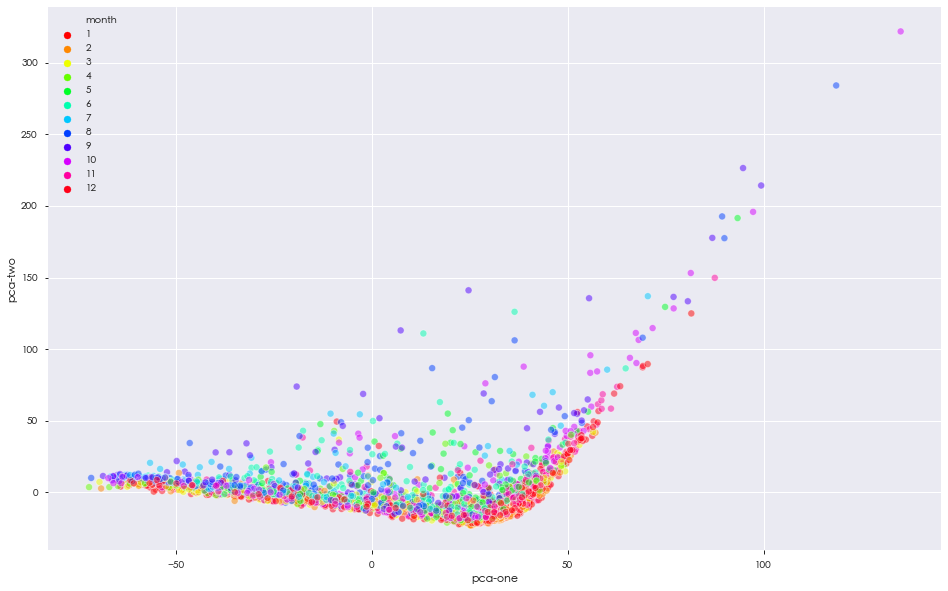

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",hue='month',
#     palette=sns.color_palette("Spectral", 12),
    palette='hsv',
    data=df_pca,
    legend="full",
    alpha=0.5
)

## PCA after standard scaling

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

imputed_scaled = StandardScaler().fit_transform(imputed)
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(imputed_scaled)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31997278 0.22170547 0.1537338  0.08212076 0.05365313 0.03981312
 0.03505287]


In [16]:
x = pd.DataFrame(data = pca.components_, columns=imputed.columns)
# x

In [17]:
df_pca = pd.DataFrame(data={'pca-one':pca_result[:,0],
                            'pca-two':pca_result[:,1],
                            'pca-three':pca_result[:,2]})
# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2]
df_pca['pca_3']= pd.qcut(df_pca['pca-three'],10)
df_pca['month'] = imputed.index.month

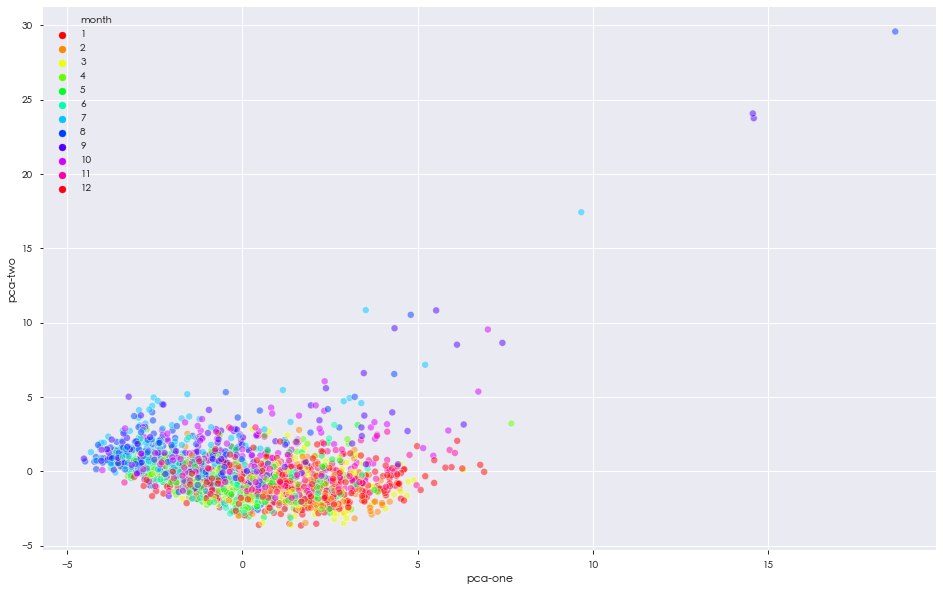

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",hue='month',
#     palette=sns.color_palette("Spectral", 12),
    palette='hsv',
    data=df_pca,
    legend="full",
    alpha=0.5
)

In [19]:
pca_result.shape, imputed_scaled.shape

((1840, 7), (1840, 18))

## Get historical typhoon data
Get Typhoon data from https://rdc28.cwb.gov.tw/TDB/public/warning_typhoon_list/get_warning_typhoon


In [ ]:
url = 'https://rdc28.cwb.gov.tw/TDB/public/warning_typhoon_list/get_warning_typhoon'
headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:71.0) Gecko/20100101 Firefox/71.0', 
           'Accept':'application/json, text/javascript, */*; q=0.01',
           'Accept-Language': 'en-US,en;q=0.5',
           'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
           'X-Requested-With':'XMLHttpRequest',
           'Origin':'https://rdc28.cwb.gov.tw', 
           'DNT':'1',
           'Connetction':'keep-alive',
           'Referer':'https://rdc28.cwb.gov.tw/TDB/public/warning_typhoon_list/'}
# cookies = {'PHPSESSID':'8fenapdmvtib3ftjhnd9s6fvu7', 'TS01b0fe7f':'0107dddfef6e23ed6decf1f7505fd67c9fcd4ce33443bfb213e263ea354912aaa98734383d60bb9ef0badb52568e65ba3e4e676d65'}

# Host: rdc28.cwb.gov.tw
# User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:71.0) Gecko/20100101 Firefox/71.0
# Accept: application/json, text/javascript, */*; q=0.01
# Accept-Language: en-US,en;q=0.5
# Accept-Encoding: gzip, deflate, br
# Content-Type: application/x-www-form-urlencoded; charset=UTF-8
# X-Requested-With: XMLHttpRequest
# Content-Length: 8
# Origin: https://rdc28.cwb.gov.tw
# DNT: 1
# Connection: keep-alive
# Referer: https://rdc28.cwb.gov.tw/TDB/public/warning_typhoon_list/
# Cookie: PHPSESSID=8fenapdmvtib3ftjhnd9s6fvu7; TS01b0fe7f=0107dddfef6e23ed6decf1f7505fd67c9fcd4ce33443bfb213e263ea354912aaa98734383d60bb9ef0badb52568e65ba3e4e676d65
# Pragma: no-cache
# Cache-Control: no-cache

try:
    r = requests.post(url,{
    'year':'all'
    } ,verify=True, headers=headers)
    r.encoding = 'utf-8-sig'
#     r.text
#     table = pd.read_html(r.text, header=None)[1]

except Exception as e:
    print('Error:', e)


In [ ]:
js = r.json()
table = pd.DataFrame.from_dict(js)
table['date'] = pd.to_datetime(table['sea_start_datetime'], format='%Y-%m-%d %H:%M:%S')
table['date_end'] = pd.to_datetime(table['sea_end_datetime'], format='%Y-%m-%d %H:%M:%S')
# typhoon = table[(table['date']>=df_num.index.min()) & (table['official_path_category'].isin(['1','2','3','4','6']))] ; typhoon.tail(20)
typhoon = table[(table['date']>=imputed.index.min())] 

In [ ]:
typhoon.columns

In [ ]:
typ = pd.DataFrame()
for r in typhoon.itertuples(index=False):
    temp = pd.DataFrame(index=pd.date_range(start=r.date, end=r.date_end), 
                        data={'id':r.id, 'cht_name':r.cht_name,'eng_name':r.eng_name, 
                              'path':r.official_path_category, 'max_WS':r.max_wind_speed,
                              'max_range7':r.max_range7, 'max_range10':r.max_range10})
    typ = typ.append(temp)
typ.index = typ.index.date
typ

In [ ]:
idx = typ[typ.index.duplicated(keep='first')].index
typ[typ.index.isin(idx)]

In [ ]:
typ = typ[~typ.index.duplicated(keep='first')].copy()

In [ ]:
typ['path'].replace('', '0', inplace=True)
typ.path.unique()

In [ ]:
# typ = typ[typ.path.isin(['1','2','3','6'])]
typ
typ.to_csv('typhoon_all.csv')

## Load and combine typhoon data

In [20]:
typ = pd.read_csv('typhoon_all.csv', index_col=0, parse_dates=True)
typ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2019-09-29 to 2010-09-01
Data columns (total 7 columns):
id             129 non-null int64
cht_name       129 non-null object
eng_name       129 non-null object
path           129 non-null int64
max_WS         129 non-null int64
max_range7     129 non-null int64
max_range10    94 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 8.1+ KB


In [50]:
typ.path.unique()

array([ 0,  4,  1,  7,  2,  3, 10,  5,  6,  9])

In [47]:
combined = imputed.merge(typ, how='left', left_index=True, right_index=True, indicator=True, validate='1:1')

### save dataframe for prediction

In [66]:
weather_save = imputed.merge(typ['path'], how='left', left_index=True, right_index=True, indicator=True, validate='1:1')
weather_save['path'] = weather_save.path.fillna(-1).astype(int)
weather_save['_merge'] = weather_save['_merge'].replace({'left_only':0, 'both':1}).astype(int)

typ_off = pd.read_csv('typhoon_off.csv', index_col=0, parse_dates=True)
weather_save = weather_save.join(typ_off)

weather_save['off'].replace({True:2, False:1, np.nan:0}, inplace=True)

weather_save.rename(columns={'_merge':'seaWarning'}, inplace=True)
weather_save.to_csv('weather_processed.csv')

### Filter typhoon date by max wind speed threshold

In [32]:
combined['path'].fillna('-1', inplace=True)
# combined['month']= combined.index.month.astype('category')
combined['month'] = combined.index.month

combined['_merge'].cat.as_ordered(inplace=True)
combined['_merge_code'] = combined['_merge'].cat.codes
combined['_merge_code'].replace(0, 0.2, inplace=True)

In [33]:
# combined['WSGust_max'] = combined[['WSGust_Yilan','WSGust_Suao', 'WSGust_Keelong', 'WSGust_ZZH','WSGust_ANBU']].max(axis=1)
combined['WSGust_max'] = combined.loc[:, combined.columns.str.match('WSGust')].max(axis=1)
x = combined.loc[combined.groupby('id')['WSGust_max'].idxmax()]

每秒瞬間風速>17.2 (八級風& 輕度颱風中心風速定義)
or 
每秒瞬間風速>24.5 (十級風)
如果選定測站的最大風速在颱風警報日期內都沒有超過以上值，表示颱風應該未直接登陸影響兩地
每個颱風期間只標記瞬間風速最大的那一日

In [34]:
x['typ']= pd.cut(x.WSGust_max, bins=(0,24.5,99), labels=['normal', 'strong'])
combined = combined.merge(x['typ'], how='left', left_index=True, right_index=True, indicator='_exist')
combined['typ'] = combined['typ'].cat.add_categories("NA").fillna("NA")

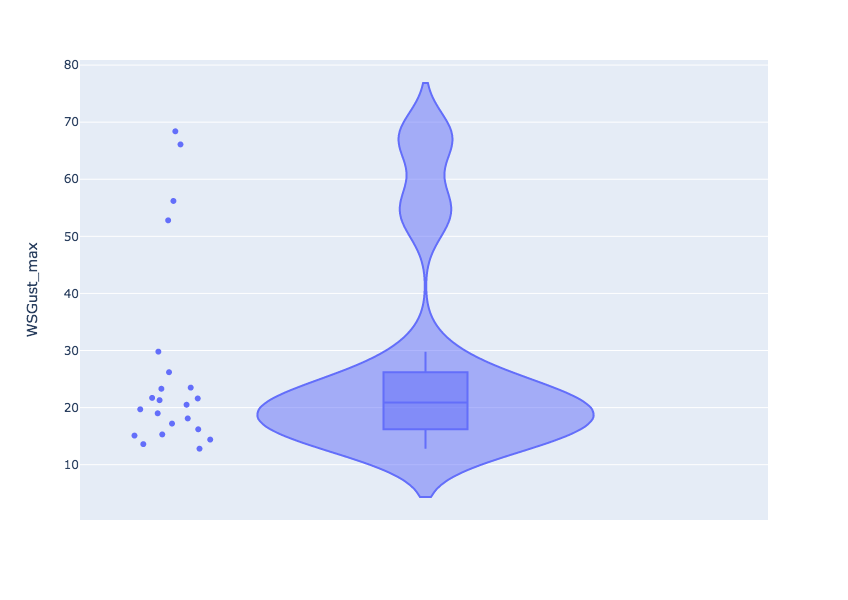

In [35]:
fig = px.violin(x, y="WSGust_max", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [36]:
combined.drop(columns=['_merge', '_merge_code'], inplace=True)
combined['typ'].cat.categories , combined['typ'].unique()

(Index(['normal', 'strong', 'NA'], dtype='object'), [NA, normal, strong]
 Categories (3, object): [normal < strong < NA])

From pandas doc:
The result of unique() is not always the same as Series.cat.categories, because Series.unique() has a couple of guarantees, namely that it returns categories in the order of appearance, and it only includes values that are actually present.

Make the type of typhoon as numerical for plotting as size variables. 
Only typhoon actually passed will be enlarged. 

In [37]:
combined['typ_code'] = combined['typ'].replace({'NA':0.2, 'normal':0.2, 'strong':2})
combined.typ_code.value_counts()

0.2    1834
2.0       6
Name: typ_code, dtype: int64

## Try TSNE

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=2, perplexity=50, n_iter=500, early_exaggeration=50)
tsne_results = tsne.fit_transform(imputed_scaled)

combined['tsne_1'] = tsne_results[:,0]
combined['tsne_2'] = tsne_results[:,1]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1840 samples in 0.004s...
[t-SNE] Computed neighbors for 1840 samples in 0.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1840
[t-SNE] Computed conditional probabilities for sample 1840 / 1840
[t-SNE] Mean sigma: 1.039786
[t-SNE] Computed conditional probabilities in 0.190s
[t-SNE] Iteration 50: error = 404.4311829, gradient norm = 1.0748214 (50 iterations in 2.787s)
[t-SNE] Iteration 100: error = 411.8935547, gradient norm = 1.0356377 (50 iterations in 3.361s)
[t-SNE] Iteration 150: error = 410.5956116, gradient norm = 1.0460644 (50 iterations in 2.850s)
[t-SNE] Iteration 200: error = 413.1405029, gradient norm = 1.0385544 (50 iterations in 2.844s)
[t-SNE] Iteration 250: error = 410.7639465, gradient norm = 1.0606437 (50 iterations in 3.047s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 410.763947
[t-SNE] Iteration 300: error = 1.8045378, gradient norm = 0.0035938 (50 iterations in 

In [46]:
rmax(500)
cmax(500)
combined.head(500)

,Temperature_Taipei,RH_Taipei,WS_Taipei,WSGust_Taipei,Precp_Taipei,SunShineRate_Taipei,Temperature_Yilan,RH_Yilan,WS_Yilan,WSGust_Yilan,Precp_Yilan,SunShineRate_Yilan,Temperature_Suao,RH_Suao,WS_Suao,WSGust_Suao,Precp_Suao,SunShineRate_Suao,id,cht_name,eng_name,path,max_WS,max_range7,max_range10,month,WSGust_max,typ,_exist,typ_code,tsne_1,tsne_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,13.7,56.0,3.6,11.5,0.0,29.3,14.0,61.0,4.2,11.7,0.0,53.8,14.5,58.0,3.4,19.0,0.0,14.2,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,19.0,NA,left_only,0.2,15.744710,-2.645691
2015-01-02,14.2,57.0,4.1,13.7,0.0,48.2,13.8,66.0,1.7,7.1,0.0,8.5,14.5,62.0,1.6,8.8,0.0,3.8,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,13.7,NA,left_only,0.2,14.053843,4.096920
2015-01-03,16.5,59.0,2.4,9.5,0.0,77.5,15.2,71.0,1.5,5.3,0.0,31.1,15.1,73.0,1.5,7.6,0.0,19.8,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,9.5,NA,left_only,0.2,13.858139,6.878344
2015-01-04,17.4,68.0,1.1,5.8,0.0,84.1,17.3,72.0,1.9,6.1,0.0,86.8,17.3,75.0,2.5,10.4,0.0,82.0,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,10.4,NA,left_only,0.2,22.296839,11.744214
2015-01-05,18.5,75.0,0.6,5.1,0.0,34.9,18.7,79.0,1.6,5.4,0.0,43.3,19.1,78.0,1.3,8.8,0.0,13.2,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,8.8,NA,left_only,0.2,9.660925,17.463408
2015-01-06,19.5,73.0,2.6,12.7,0.0,5.7,19.7,78.0,2.4,10.9,0.0,42.4,19.7,78.0,1.9,11.4,19.5,57.4,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,12.7,NA,left_only,0.2,13.726049,19.901485
2015-01-07,15.4,75.0,3.2,10.5,0.0,0.0,16.3,79.0,2.7,8.3,1.3,0.0,16.0,83.0,3.0,15.8,17.6,0.0,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,15.8,NA,left_only,0.2,1.262657,-5.514268
2015-01-08,13.5,60.0,2.7,10.9,0.0,0.0,13.7,64.0,2.8,8.9,0.0,12.2,13.8,64.0,2.1,13.2,0.0,2.8,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,13.2,NA,left_only,0.2,13.180201,-0.712924
2015-01-09,16.0,59.0,3.7,13.8,0.0,44.2,15.2,67.0,1.6,6.3,0.0,5.6,15.7,65.0,1.9,8.3,0.0,3.8,NaN,NaN,NaN,-1,NaN,NaN,NaN,1,13.8,NA,left_only,0.2,13.819766,4.068330


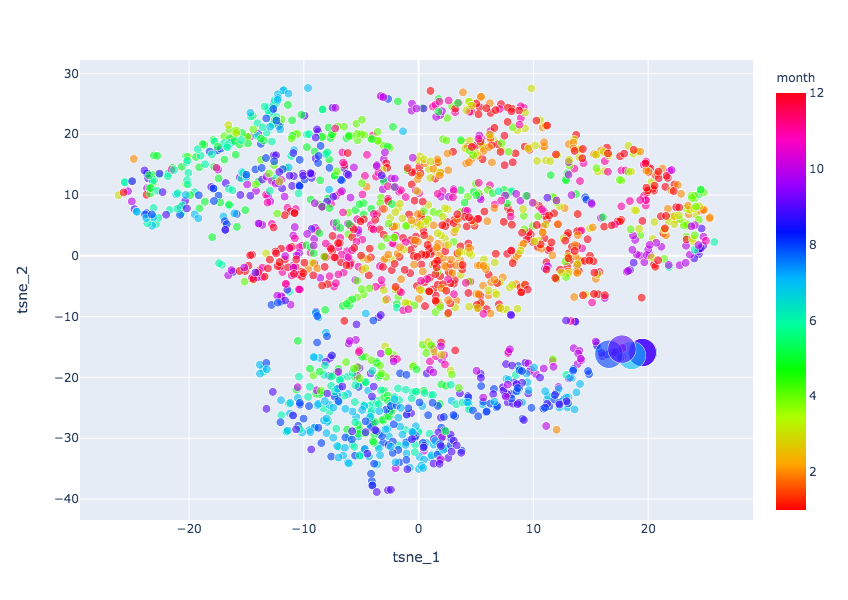

In [43]:
select_col = combined.columns[combined.columns.str.startswith(
    ('Temperature', 'RH', 'WS', 'Precp', 'SunShine', 'GloblRad', 'max_WS')
    )]
# select_col
fig = px.scatter(combined.reset_index(), x='tsne_1', y='tsne_2', hover_name='date',color='month', size='typ_code',
                hover_data = select_col,
                color_continuous_scale=px.colors.cyclical.HSV, 
                opacity=0.6)

fig.show()

# ['index', 'StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min', 'Td dew point', 'RH', 'RHMin', 'WS', 'WD', 'WSGust', 'WDGust', 'Precp', 'PrecpHour', 'PrecpMax10', 'PrecpHrMax', 'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean', 'EvapA', 'UVI Max', 'Cloud Amount', 'id', 'cht_name', 'eng_name', 'path', 'max_WS', 'max_range7', 'max_range10', '_merge', 'tsne_1', 'tsne_2'] but received: temp

In [ ]:
fig.write_image('test.png')

In [235]:
exa = 30
for p in range(5,210,10):
    

    tsne = TSNE(n_components=2, verbose=0, perplexity=p, n_iter=1000, early_exaggeration=exa)
    tsne_results = tsne.fit_transform(imputed_scaled)

    combined['tsne_1'] = tsne_results[:,0]
    combined['tsne_2'] = tsne_results[:,1]

    #select_col = combined.columns[combined.columns.str.startswith(('Temperature', 'RH', 'WS', 'WSGust', 'Precp', 'SunShine', 'VisbMean','Cloud Amount'))]
    fig = px.scatter(combined, x='tsne_1', y='tsne_2',color='month', size='typ_code',
                    #hover_data=['Temperature', 'RH', 'WS', 'WSGust', 'Precp', 'SunShine', 'VisbMean','Cloud Amount','cht_name', 'path','max_WS'],
                    #hover_data = select_col,
                    color_continuous_scale=px.colors.cyclical.HSV, 
                    opacity=0.6)

#     fig.show()
    fname = f'perplexity_{p:03}_exag_{exa:02}' + '.png'
    fig.write_image(fname)

# ['index', 'StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min', 'Td dew point', 'RH', 'RHMin', 'WS', 'WD', 'WSGust', 'WDGust', 'Precp', 'PrecpHour', 'PrecpMax10', 'PrecpHrMax', 'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean', 'EvapA', 'UVI Max', 'Cloud Amount', 'id', 'cht_name', 'eng_name', 'path', 'max_WS', 'max_range7', 'max_range10', '_merge', 'tsne_1', 'tsne_2'] but received: temp

In [ ]:
fname = f'perplexity_{i:03}_exag_{i:02}' + '.png' ; fname

In [ ]:
import plotly.io as pio
import plotly

pio.orca.shutdown_server()
pio.orca.status

In [ ]:
plotly.io.orca.config